In [2]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

import dynchro

In [38]:
b3 = anndata.read_h5ad('branching_data_vsc42417/ad_b3.h5ad')
b2 = anndata.read_h5ad('branching_data_vsc42417/ad_b2.h5ad')

In [39]:
b3.obsm['X_lmds'] = b3.obsm['lmds']
b2.obsm['X_lmds'] = b2.obsm['lmds']

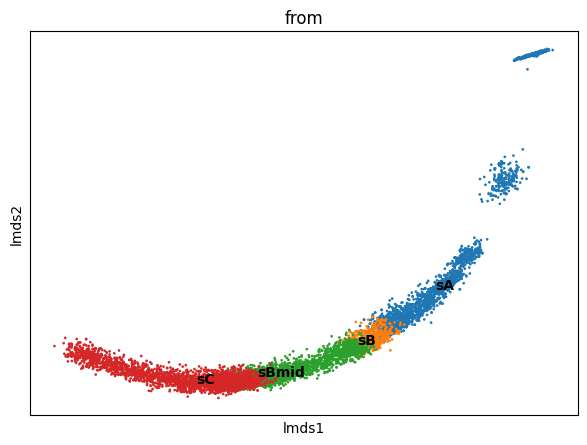

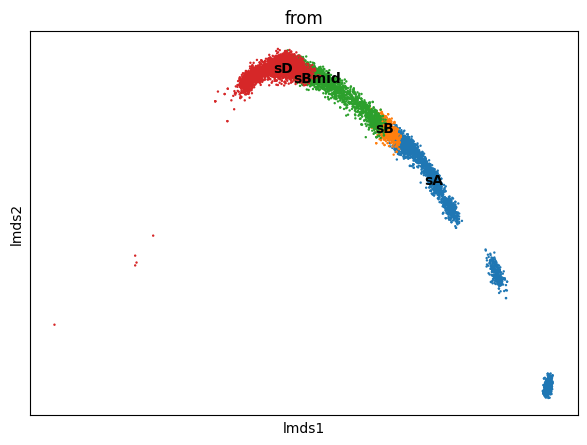

In [40]:
sc.pl.scatter(b3, basis = "lmds", color='from', legend_loc='on data')
sc.pl.scatter(b2, basis = "lmds", color='from', legend_loc='on data')

In [41]:
import scipy as sp
def landmark_MDS(D, lands, dim):
	Dl = D[:,lands]
	n = len(Dl)

	# Centering matrix
	H = - np.ones((n, n))/n
	np.fill_diagonal(H,1-1/n)
	# YY^T
	H = -H.dot(Dl**2).dot(H)/2

	# Diagonalize
	evals, evecs = np.linalg.eigh(H)

	# Sort by eigenvalue in descending order
	idx   = np.argsort(evals)[::-1]
	evals = evals[idx]
	evecs = evecs[:,idx]

	# Compute the coordinates using positive-eigenvalued components only
	w, = np.where(evals > 0)
	if dim:
		arr = evals
		w = arr.argsort()[-dim:][::-1]
		if np.any(evals[w]<0):
			print('Error: Not enough positive eigenvalues for the selected dim.')
			return []
	if w.size==0:
		print('Error: matrix is negative definite.')
		return []

	V = evecs[:,w]
	L = V.dot(np.diag(np.sqrt(evals[w]))).T
	N = D.shape[1]
	Lh = V.dot(np.diag(1./np.sqrt(evals[w]))).T
	Dm = D - np.tile(np.mean(Dl,axis=1),(N, 1)).T
	dim = w.size
	X = -Lh.dot(Dm)/2.
	X -= np.tile(np.mean(X,axis=1),(N, 1)).T

	_, evecs = sp.linalg.eigh(X.dot(X.T))

	return (evecs[:,::-1].T.dot(X)).T

In [42]:
tf_indices = [x for x in b2.var.index if "TF" in x]
modelb2 = b2[:,b2.var.index.isin(tf_indices)]

In [54]:
tf_indices

['Burn1_TF1',
 'Burn1_TF2',
 'Burn1_TF3',
 'Burn2_TF1',
 'Burn2_TF2',
 'Burn3_TF1',
 'Burn3_TF2',
 'Burn4_TF1',
 'Burn4_TF2',
 'Burn5_TF1',
 'Burn5_TF2',
 'A1_TF1',
 'A1_TF2',
 'A1_TF3',
 'A2_TF1',
 'A2_TF2',
 'A2_TF3',
 'A3_TF1',
 'A3_TF2',
 'A3_TF3',
 'A3_TF4',
 'A4_TF1',
 'A4_TF2',
 'A5_TF1',
 'B1_TF1',
 'B1_TF2',
 'B2_TF1',
 'B2_TF2',
 'B2_TF3',
 'B3_TF1',
 'B3_TF2',
 'B4_TF1',
 'B4_TF2',
 'B5_TF1',
 'B5_TF2',
 'B5_TF3',
 'B6_TF1',
 'B6_TF2',
 'B6_TF3',
 'B6_TF4',
 'B6_TF5',
 'B6_TF6',
 'B7_TF1',
 'B8_TF1',
 'B8_TF2',
 'B9_TF1',
 'B9_TF2',
 'B9_TF3',
 'B9_TF4',
 'B9_TF5',
 'B10_TF1',
 'B10_TF2',
 'B10_TF3',
 'B10_TF4',
 'B10_TF5',
 'B10_TF6',
 'B10_TF7',
 'B10_TF8',
 'B10_TF9',
 'B11_TF1',
 'B12_TF1',
 'B13_TF1',
 'B13_TF2',
 'B13_TF3',
 'B14_TF1',
 'B14_TF2',
 'B14_TF3',
 'B14_TF4',
 'C1_TF1',
 'C1_TF2',
 'C1_TF3',
 'C1_TF4',
 'C1_TF5',
 'C1_TF6',
 'C1_TF7',
 'C2_TF1',
 'C3_TF1',
 'C4_TF1',
 'C4_TF2',
 'C5_TF1',
 'C5_TF2',
 'C6_TF1',
 'C6_TF2',
 'D1_TF1',
 'D1_TF2',
 'D1_TF3',
 'D

In [52]:
import random
from scipy.spatial import distance

sc.pp.log1p(modelb2)
sc.pp.scale(modelb2)

landmarks = random.sample(range(0, modelb2.X.shape[0]), 1000)
landmarks = np.array(landmarks)
landmark_points = modelb2.X[landmarks, :]

Dl2 = distance.cdist(landmark_points.todense(), modelb2.X.todense(), 'correlation')


In [47]:
landmarks

array([4241,  473, 7359, 8780, 2661, 7309,  658, 6518, 9386, 2813, 7858,
       7532,  634, 4162, 6702,  688, 6609, 6943, 4054, 3810, 7888, 1018,
       4249, 4202,  164, 9785, 4061, 8347, 7276, 1685, 7245, 2774, 3002,
       8314, 7748, 8612, 5588, 9323, 7124, 2623, 2691, 5572, 9289, 5488,
       9883, 2393, 2652, 7463, 2066, 2912, 2183,   89, 5372, 2386, 7365,
       9574, 1273, 8437, 6671,  241, 7412, 9377, 3223, 4833, 2803, 1847,
       1687, 2862, 9922, 2971, 2707, 1274, 7536, 4865, 6292, 2717, 6792,
       8700, 4084, 4669, 4388, 7699, 2587, 6270, 7829, 9751, 9841, 8979,
       3164, 6780, 6693, 9504, 9469, 9909, 3587, 1711, 2718, 2413, 8763,
       9536, 8421, 7917, 9126,  603, 8504,  126, 7023,  133, 1066, 9533,
       3357, 5543, 5275, 7489, 2895, 2846, 3530, 1362, 6054, 3715, 3261,
       3589, 1740, 3352, 3908, 8597, 2639,  315, 6661,  128, 4205, 2142,
       4127, 6261,  171, 7514, 5563,  871, 3397, 9912, 1689, 3488, 4982,
       2904, 7314, 3082, 2313, 9036, 6069, 2733, 19

In [48]:
all_counts = modelb2.X.todense()
landmark_points = landmark_points.todense()

In [53]:
res2 = landmark_MDS(Dl2, landmarks, 3)

ValueError: array must not contain infs or NaNs

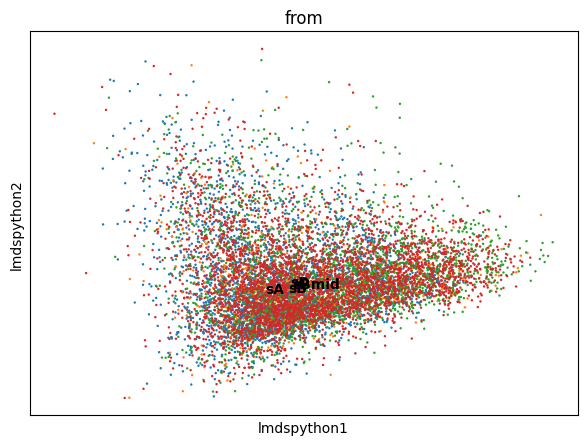

In [ ]:
modelb2.obsm['X_lmdspython'] = res2
sc.pl.scatter(modelb2, basis = "lmdspython", color='from', legend_loc='on data')

In [26]:
modelb2

View of AnnData object with n_obs × n_vars = 10000 × 100
    obs: 'step_ix', 'simulation_i', 'sim_time', 'from'
    var: 'module_id', 'basal', 'burn', 'independence', 'color', 'is_tf', 'is_hk', 'transcription_rate', 'splicing_rate', 'translation_rate', 'mrna_halflife', 'protein_halflife', 'mrna_decay_rate', 'protein_decay_rate', 'max_premrna', 'max_mrna', 'max_protein', 'mol_premrna', 'mol_mrna', 'mol_protein'
    uns: 'traj_dimred_segments', 'traj_milestone_network', 'traj_progressions', 'from_colors'
    obsm: 'dimred', 'lmds', 'X_lmds', 'X_lmdspython'
    layers: 'counts_protein', 'counts_spliced', 'counts_unspliced', 'logcounts'

In [36]:
%load_ext rpy2.ipython

In [37]:
%%R -i all_counts,landmark_points -o res

library("lmds")
print(dim(all_counts))

res <- lmds::lmds(all_counts, distance_method = "pearson")

res


[1] 10000   100
Warning in irlba(x, n, ...) :
  fast code path error starting vector near the null space; re-trying with fastpath=FALSE.
Error in irlba(x, n, ...) : starting vector near the null space
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages
Error in irlba(x, n, ...) : starting vector near the null space


RInterpreterError: Failed to parse and evaluate line '\nlibrary("lmds")\nprint(dim(all_counts))\n\nres <- lmds::lmds(all_counts, distance_method = "pearson")\n\nres\n'.
R error message: 'Error in irlba(x, n, ...) : starting vector near the null space'
R stdout:
Warning in irlba(x, n, ...) :
  fast code path error starting vector near the null space; re-trying with fastpath=FALSE.
Error in irlba(x, n, ...) : starting vector near the null space
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

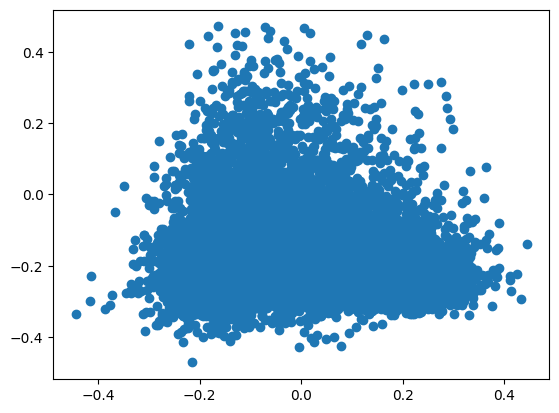

In [ ]:
import matplotlib.pyplot as plt
plt.plot(res[:, 0], res[:, 1], "o")